# The BAK–TANG–WIESENFELD Sandpile

## General features

+ First published by Bak, Tang, and Wiesenfeld (1987).
+ Motivated by avalanching behaviour of a real sandpile.
+ In one dimension rules represent downward movement of sand grains.
+ Defined in any dimension, exactly solved (trivial) in one.
+ Stochastic (bulk) drive, deterministic relaxation.
+ Non-Abelian in its original definition.
+ Many results actually refer to Dhar’s (1990a) Abelian sandpile, Sec. 4.2.
+ Simple scaling behaviour disputed, multiscaling proposed.
+ Exponents listed in Table 4.1, p. 92, are for the Abelian BTW Model.

## Rules

+ d dimensional (usually) hyper-cubic lattice and q the coordination number (on cubic lattices q = 2d).
+ Choose (arbitrary) critical slope z^c = q − 1.
+ Each site n ∈ {1,..., L}^d has slope z_n.
+ _Initialisation_: irrelevant, model studied in the stationary state.
+ _Driving_: add a grain at n0 chosen at random and update all uphill nearest neighbours n'0 of n0:
z_n0 →z_n0 + q/2
z_n0 →z_n'0 − 1.
+ _Toppling_: for each site n with z_n > z^c distribute q grains among its nearest neighbours n'
:
z_n →z_n − q
∀n'.nn.n z_n →z_n + 1.
In one dimension site n = L relaxes according to 
z_L → z_L − 1
z_L−1 → z_L−1 + 1.
+ _Dissipation_: grains are lost at open boundaries.
+ _Parallel update_: discrete microscopic time, sites exceeding zc at time t topple at t + 1 (updates in
sweeps).
+ _Separation of time scales_: drive only once all sites are stable, i.e. z_n ≤ z^c (quiescence).
+ _Key observables_ (see Sec. 1.3):
avalanche sizes, the total number of topplings until quiescence;
avalanche duration T , the total number of parallel updates until quiescence


In [2]:
from SOC.models import BTW

## Empty model

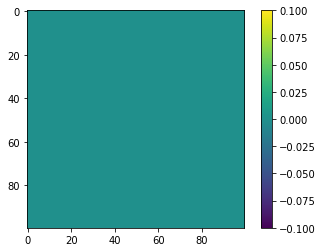

In [20]:
b = BTW(100)
b.plot_state();

## Running model

In [6]:
b.run(30)

100%|██████████| 30/30 [00:05<00:00,  5.43it/s]


{0: {'AvalancheSize': 0, 'number_of_iterations': 0},
 1: {'AvalancheSize': 0, 'number_of_iterations': 0},
 2: {'AvalancheSize': 0, 'number_of_iterations': 0},
 3: {'AvalancheSize': 0, 'number_of_iterations': 0},
 4: {'AvalancheSize': 0, 'number_of_iterations': 0},
 5: {'AvalancheSize': 0, 'number_of_iterations': 0},
 6: {'AvalancheSize': 0, 'number_of_iterations': 0},
 7: {'AvalancheSize': 0, 'number_of_iterations': 0},
 8: {'AvalancheSize': 0, 'number_of_iterations': 0},
 9: {'AvalancheSize': 0, 'number_of_iterations': 0},
 10: {'AvalancheSize': 0, 'number_of_iterations': 0},
 11: {'AvalancheSize': 0, 'number_of_iterations': 0},
 12: {'AvalancheSize': 0, 'number_of_iterations': 0},
 13: {'AvalancheSize': 0, 'number_of_iterations': 0},
 14: {'AvalancheSize': 0, 'number_of_iterations': 0},
 15: {'AvalancheSize': 0, 'number_of_iterations': 0},
 16: {'AvalancheSize': 0, 'number_of_iterations': 0},
 17: {'AvalancheSize': 0, 'number_of_iterations': 0},
 18: {'AvalancheSize': 0, 'number_of_i

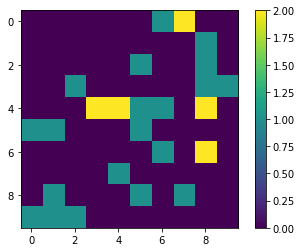

In [8]:
b.plot_state();

In [9]:
b.run(100000)

100%|██████████| 100000/100000 [03:14<00:00, 513.02it/s]


, 'number_of_iterations': 0},
 637: {'AvalancheSize': 0, 'number_of_iterations': 0},
 638: {'AvalancheSize': 0, 'number_of_iterations': 0},
 639: {'AvalancheSize': 0, 'number_of_iterations': 0},
 640: {'AvalancheSize': 0, 'number_of_iterations': 0},
 641: {'AvalancheSize': 0, 'number_of_iterations': 0},
 642: {'AvalancheSize': 0, 'number_of_iterations': 0},
 643: {'AvalancheSize': 0, 'number_of_iterations': 0},
 644: {'AvalancheSize': 0, 'number_of_iterations': 0},
 645: {'AvalancheSize': 0, 'number_of_iterations': 0},
 646: {'AvalancheSize': 0, 'number_of_iterations': 0},
 647: {'AvalancheSize': 0, 'number_of_iterations': 0},
 648: {'AvalancheSize': 0, 'number_of_iterations': 0},
 649: {'AvalancheSize': 0, 'number_of_iterations': 0},
 650: {'AvalancheSize': 0, 'number_of_iterations': 0},
 651: {'AvalancheSize': 0, 'number_of_iterations': 0},
 652: {'AvalancheSize': 0, 'number_of_iterations': 0},
 653: {'AvalancheSize': 0, 'number_of_iterations': 0},
 654: {'AvalancheSize': 0, 'number_

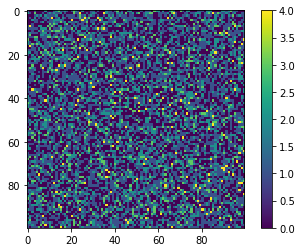

In [8]:
b.plot_state();

## Uniform model load

In [3]:
b2 = BTW(10)
b2.values[1:-1,1:-1] = 5

In [4]:
b2.AvalancheLoop()

{'AvalancheSize': 140, 'number_of_iterations': 26}

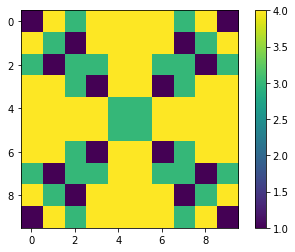

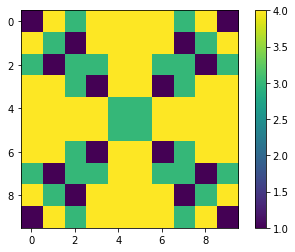

In [5]:
b2.plot_state()

In [16]:
b2 = BTW(50)
b2.values[1:-1,1:-1] = 40

In [17]:
b2.AvalancheLoop()

{'AvalancheSize': 2700, 'number_of_iterations': 7360}

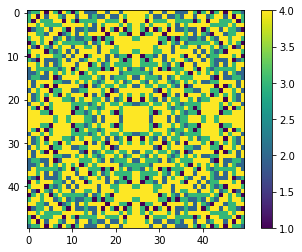

In [18]:
b2.plot_state();